In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
X=pd.read_csv("English premier league.csv")

In [3]:
X

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,8/8/2015,Bournemouth,Aston Villa,0,1,A,0,0,D,...,2,3,13,13,6,3,3,4,0,0
1,E0,8/8/2015,Chelsea,Swansea,4,2,H,2,1,H,...,3,10,15,16,4,8,1,3,1,0
2,E0,8/8/2015,Everton,Watford,3,2,H,0,1,A,...,5,5,7,13,8,2,1,2,0,0
3,E0,8/8/2015,Leicester,Sunderland,4,2,H,3,0,H,...,8,5,13,17,6,3,2,4,0,0
4,E0,8/8/2015,Man United,Tottenham,1,0,H,1,0,H,...,1,4,12,12,1,2,2,3,0,0
5,E0,8/8/2015,Norwich,Crystal Palace,1,3,A,0,1,A,...,6,7,14,20,1,4,1,0,0,0
6,E0,9/8/2015,Arsenal,West Ham,0,2,A,0,1,A,...,6,4,12,9,5,4,1,3,0,0
7,E0,9/8/2015,Newcastle,Southampton,2,1,H,1,1,D,...,4,5,9,12,6,6,2,4,0,0
8,E0,9/8/2015,Stoke,Liverpool,0,1,A,0,0,D,...,1,3,9,16,3,5,2,4,0,0
9,E0,10/8/2015,West Brom,Man City,0,3,A,0,2,A,...,2,7,12,9,6,6,4,1,0,0


In [4]:
X.columns

Index([u'Div', u'Date', u'HomeTeam', u'AwayTeam', u'FTHG', u'FTAG', u'FTR',
       u'HTHG', u'HTAG', u'HTR', u'Referee', u'HS', u'AS', u'HST', u'AST',
       u'HF', u'AF', u'HC', u'AC', u'HY', u'AY', u'HR', u'AR'],
      dtype='object')

### Starting prepping the data so as to explore the data and handle null (or) missing values.

In [5]:
X.Div.value_counts()

E0    380
Name: Div, dtype: int64

### The Div is Categorical

In [6]:
X[X.Div.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The Div has no null values

In [7]:
X.Date.value_counts()

26/12/15     10
15/05/16      9
23/01/16      8
5/3/2016      8
26/09/15      8
2/2/2016      8
2/4/2016      8
21/11/15      8
6/2/2016      8
28/12/15      8
17/10/15      8
29/08/15      8
5/12/2015     8
2/1/2016      8
7/5/2016      7
19/12/15      7
13/02/16      7
3/10/2015     7
7/11/2015     7
19/09/15      7
12/9/2015     7
16/01/16      7
31/10/15      7
9/4/2016      7
13/01/16      7
28/11/15      6
24/10/15      6
15/08/15      6
8/8/2015      6
30/04/16      6
             ..
28/02/16      2
23/11/15      1
10/8/2015     1
28/09/15      1
21/12/15      1
18/04/16      1
21/04/16      1
18/01/16      1
18/10/15      1
29/12/15      1
2/11/2015     1
14/08/15      1
17/08/15      1
30/12/15      1
14/12/15      1
13/03/16      1
19/04/16      1
2/5/2016      1
22/11/15      1
25/04/16      1
27/09/15      1
24/08/15      1
13/04/16      1
14/03/16      1
17/05/16      1
7/12/2015     1
14/09/15      1
6/12/2015     1
10/5/2016     1
19/10/15      1
Name: Date, dtype: int64

### The Date is Categorical

In [8]:
X[X.Date.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The Date has no null values

In [9]:
X.HomeTeam.value_counts()

Tottenham         19
Man United        19
West Ham          19
Aston Villa       19
Bournemouth       19
Swansea           19
Chelsea           19
Liverpool         19
Leicester         19
Man City          19
Arsenal           19
Crystal Palace    19
Sunderland        19
Watford           19
Norwich           19
Newcastle         19
Everton           19
Stoke             19
West Brom         19
Southampton       19
Name: HomeTeam, dtype: int64

### The HomeTeam is Categorical

In [10]:
X[X.HomeTeam.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The HomeTeam has no null values

In [11]:
X.AwayTeam.value_counts()

Tottenham         19
Man United        19
West Ham          19
Aston Villa       19
Bournemouth       19
Swansea           19
Chelsea           19
Liverpool         19
Norwich           19
Man City          19
Leicester         19
Arsenal           19
Crystal Palace    19
Sunderland        19
Watford           19
Newcastle         19
Everton           19
Stoke             19
West Brom         19
Southampton       19
Name: AwayTeam, dtype: int64

### The AwayTeam is Categorical

In [12]:
X[X.AwayTeam.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The AwayTeam has no null values

In [13]:
X.FTHG.value_counts()

1    111
2     85
0     76
3     61
4     29
5     12
6      3
8      2
7      1
Name: FTHG, dtype: int64

### The FTHG is Continuous

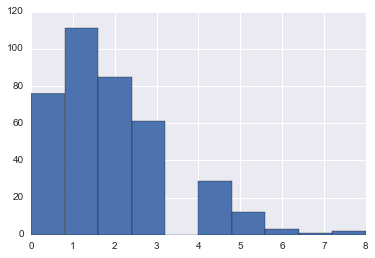

In [14]:
X.FTHG.hist(bins=10)

In [15]:
X[X.FTHG.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The FTHG has no null values

In [16]:
X.FTAG.value_counts()

1    110
0    107
2     79
3     53
4     19
5     10
6      2
Name: FTAG, dtype: int64

### FTAG is Continuous

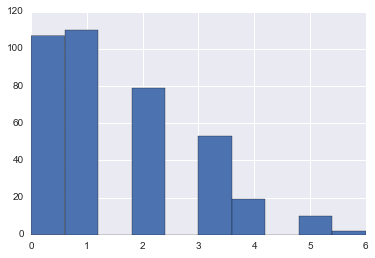

In [17]:
X.FTAG.hist(bins=10)

In [18]:
X[X.FTAG.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The FTAG has no null values

In [19]:
X.FTR.value_counts()

H    210
A    170
Name: FTR, dtype: int64

### FTR is Categorical

In [20]:
X[X.FTR.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The FTR has no null values

In [21]:
X.HTHG.value_counts()

0    196
1    123
2     51
3      9
4      1
Name: HTHG, dtype: int64

### The HTHG is Continuous

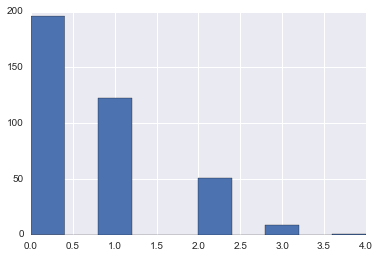

In [22]:
X.HTHG.hist(bins=10)

In [23]:
X[X.HTHG.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### the HTHG has no null values

In [24]:
X.HTAG.value_counts()

0    226
1    112
2     37
3      5
Name: HTAG, dtype: int64

### The HTAG is Continuous

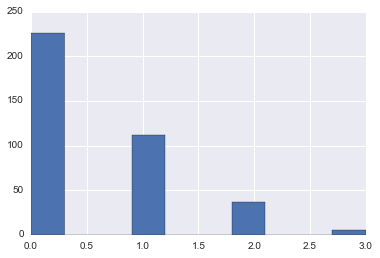

In [25]:
X.HTAG.hist(bins=10)

In [26]:
X[X.HTAG.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The HTAG has no null values

In [27]:
X.HTR.value_counts()

D    168
H    125
A     87
Name: HTR, dtype: int64

### The HTR is Categorical

In [28]:
X[X.HTR.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The HTR has no null values

In [29]:
X.Referee.value_counts()

M Dean           33
A Taylor         31
M Clattenburg    30
M Atkinson       29
M Jones          28
C Pawson         28
R Madley         26
M Oliver         26
R East           25
J Moss           25
A Marriner       24
L Mason          22
K Friend         20
N Swarbrick      18
G Scott           4
P Tierney         4
S Attwell         4
K Stroud          2
S Hooper          1
Name: Referee, dtype: int64

### The Referee is Categorical

In [30]:
X[X.Referee.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The Referee has no null values 

In [31]:
X.HS.value_counts()

11    32
13    32
10    28
12    27
14    26
15    25
9     24
16    22
19    21
18    18
17    17
21    15
8     15
22    14
20    11
6     10
7      9
26     6
23     5
5      5
25     3
4      3
28     2
34     2
3      1
2      1
37     1
24     1
27     1
29     1
32     1
1      1
Name: HS, dtype: int64

### The HS is Continuous

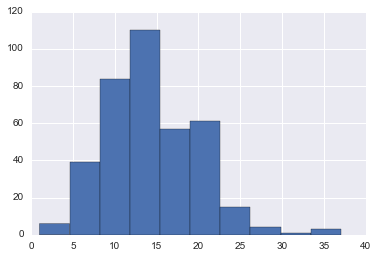

In [32]:
X.HS.hist(bins=10)

In [33]:
X[X.HS.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The HS has no null values

In [34]:
X.AS.value_counts()

11    39
10    35
7     32
9     32
12    30
13    29
8     26
16    22
15    19
14    19
6     17
5     16
17    11
18    10
19    10
20     7
4      7
3      5
2      3
21     3
24     2
22     2
23     2
26     2
Name: AS, dtype: int64

### The AS is Continuous

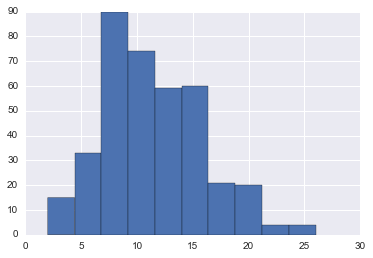

In [35]:
X.AS.hist(bins=10)

In [36]:
X[X.AS.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The AS has no null values

In [37]:
X.HST.value_counts()

5     63
2     55
4     52
6     47
3     47
7     31
1     29
8     21
9     11
0      7
10     6
11     5
12     4
14     1
13     1
Name: HST, dtype: int64

### The HST is Continuous

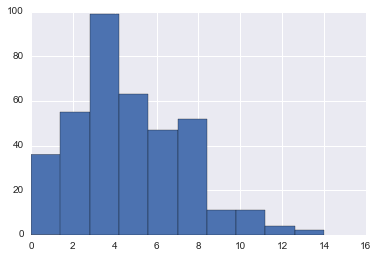

In [38]:
X.HST.hist(bins=10)

In [39]:
X[X.HST.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The HST has no null values

In [40]:
X.AST.value_counts()

3     73
4     72
2     62
5     50
6     32
7     28
1     26
0     17
9      8
8      8
11     2
12     1
10     1
Name: AST, dtype: int64

### The AST is continuous

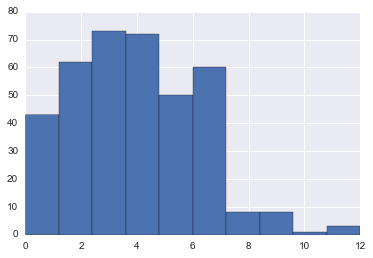

In [41]:
X.AST.hist(bins=10)

In [42]:
X[X.AST.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The AST has no null values

In [43]:
X.HF.value_counts()

11    46
10    40
9     40
8     39
12    38
7     30
6     29
13    26
14    23
4     17
16    12
15    12
5     11
17     6
3      3
18     3
22     1
21     1
19     1
20     1
2      1
Name: HF, dtype: int64

### HF is Continuous

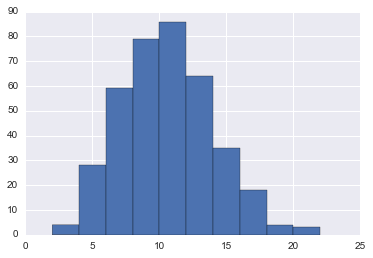

In [44]:
X.HF.hist(bins=10)

In [45]:
X[X.HF.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The HF has no null values

In [46]:
X.AF.value_counts()

13    48
11    45
12    44
10    40
9     34
8     28
14    25
15    24
7     21
6     15
16    13
17    12
5      9
19     7
18     7
4      3
21     2
20     2
22     1
Name: AF, dtype: int64

### AF is Continuous

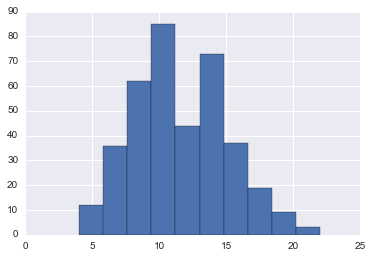

In [47]:
X.AF.hist(bins=10)

In [48]:
X[X.AF.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The AF has no null values

In [49]:
X.HC.value_counts()

4     54
5     50
7     44
6     43
3     41
8     26
9     24
1     22
2     17
11    17
10    16
0      6
12     5
13     5
16     4
14     4
15     1
18     1
Name: HC, dtype: int64

### The HC is Continuous

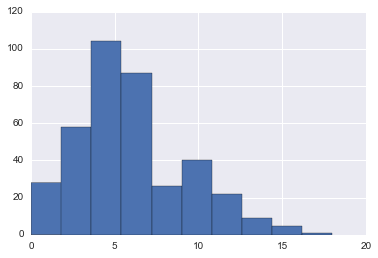

In [50]:
X.HC.hist(bins=10)

In [51]:
X[X.HC.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### HC has no null values

In [52]:
X.AC.value_counts()

4     66
3     58
5     55
7     41
6     38
2     37
8     28
1     19
9     15
0      7
11     6
10     6
12     2
14     1
13     1
Name: AC, dtype: int64

### The AC is Continuous

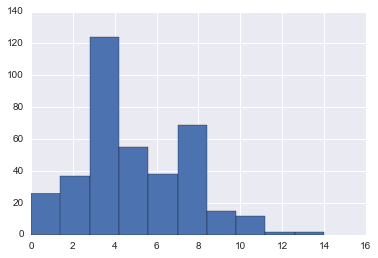

In [53]:
X.AC.hist(bins=10)

In [54]:
X[X.AC.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The AC has no null values

In [55]:
X.HY.value_counts()

1    130
2     99
0     85
3     46
4     17
5      2
6      1
Name: HY, dtype: int64

### The HY is Continuous

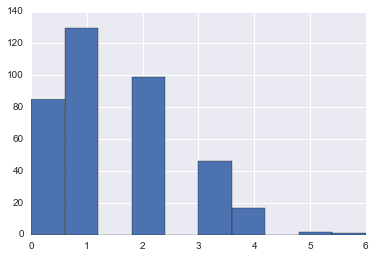

In [56]:
X.HY.hist(bins=10)

In [57]:
X[X.HY.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### HY has no null values

In [58]:
X.AY.value_counts()

1    113
2    101
0     74
3     64
4     22
5      5
9      1
Name: AY, dtype: int64

### AY is Continuous

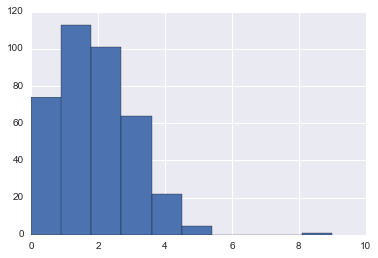

In [59]:
X.AY.hist(bins=10)

In [60]:
X[X.AY.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The AY has no null values

In [61]:
X.HR.value_counts()

0    357
1     21
2      2
Name: HR, dtype: int64

### The HR is Continuous

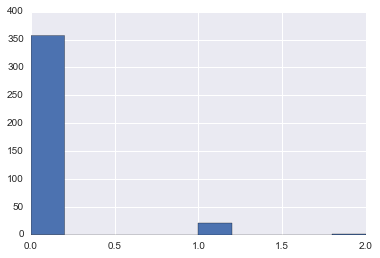

In [62]:
X.HR.hist(bins=10)

In [63]:
X[X.HR.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The HR has no Null values

In [64]:
X.AR.value_counts()

0    347
1     32
2      1
Name: AR, dtype: int64

### The AR is Continuous

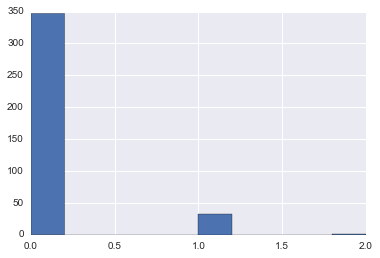

In [65]:
X.AR.hist(bins=10)

In [66]:
X[X.AR.isnull()]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


### The AR has no null values

In [67]:
X.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.792105,1.486842,0.673684,0.528947,14.313158,11.368421,4.628947,3.881579,10.057895,11.463158,5.947368,4.886842,1.447368,1.655263,0.065789,0.089474
std,1.478586,1.348246,0.814669,0.724034,5.502634,4.491687,2.583018,2.165739,3.442221,3.409007,3.258011,2.520698,1.150826,1.268493,0.268659,0.294890
min,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,14.000000,11.000000,4.500000,4.000000,10.000000,11.000000,5.500000,5.000000,1.000000,2.000000,0.000000,0.000000
75%,3.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.000000,12.000000,13.000000,8.000000,7.000000,2.000000,2.000000,0.000000,0.000000
max,8.000000,6.000000,4.000000,3.000000,37.000000,26.000000,14.000000,12.000000,22.000000,22.000000,18.000000,14.000000,6.000000,9.000000,2.000000,2.000000


In [68]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)

In [69]:
describe_categorical(X)

,Div,Date,HomeTeam,AwayTeam,FTR,HTR,Referee
count,380,380,380,380,380,380,380
unique,1,99,20,20,2,3,19
top,E0,26/12/15,Tottenham,Tottenham,H,D,M Dean
freq,380,10,19,19,210,168,33


In [70]:
X['FTR'] = pd.get_dummies(X.FTR)['A']
y= X.pop("FTR")

### Dropping Unwanted features

In [71]:
X.drop(["Div","Date","Referee","HTR"], axis=1, inplace=True)

In [72]:
categorical_variables = ['HomeTeam','AwayTeam']

for variable in categorical_variables:
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update df to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [73]:
# Look at all the columns in the dataset
def printall(X, max_rows=20):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HomeTeam_Arsenal,HomeTeam_Aston Villa,HomeTeam_Bournemouth,HomeTeam_Chelsea,HomeTeam_Crystal Palace,HomeTeam_Everton,HomeTeam_Leicester,HomeTeam_Liverpool,HomeTeam_Man City,HomeTeam_Man United,HomeTeam_Newcastle,HomeTeam_Norwich,HomeTeam_Southampton,HomeTeam_Stoke,HomeTeam_Sunderland,HomeTeam_Swansea,HomeTeam_Tottenham,HomeTeam_Watford,HomeTeam_West Brom,HomeTeam_West Ham,AwayTeam_Arsenal,AwayTeam_Aston Villa,AwayTeam_Bournemouth,AwayTeam_Chelsea,AwayTeam_Crystal Palace,AwayTeam_Everton,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham
0,0,1,0,0,11,7,2,3,13,13,6,3,3,4,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,2,2,1,11,18,3,10,15,16,4,8,1,3,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,2,0,1,10,11,5,5,7,13,8,2,1,2,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2,3,0,19,10,8,5,13,17,6,3,2,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0,1,0,9,9,1,4,12,12,1,2,2,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1,3,0,1,17,11,6,7,14,20,1,4,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,2,0,1,22,8,6,4,12,9,5,4,1,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,2,1,1,1,9,15,4,5,9,12,6,6,2,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,1,0,0,7,8,1,3,9,16,3,5,2,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,3,0,2,9,19,2,7,12,9,6,6,4,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### I'm applying RandomForest Model

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [75]:
# from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC  # you can use this though :)
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV

In [76]:
### Grid Search
n_estimators = [75]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [77]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [75]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [78]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
best_rfc = estimator.best_estimator_

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  1.0


In [81]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        44
        1.0       1.00      1.00      1.00        32

avg / total       1.00      1.00      1.00        76



In [82]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[44  0]
 [ 0 32]]


In [83]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  1.0


In [84]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [85]:
model.oob_score_

0.98376389842368106

In [86]:
y_oob = model.oob_prediction_
print "c-stat: ", roc_auc_score(y, y_oob)

c-stat:  0.997464985994


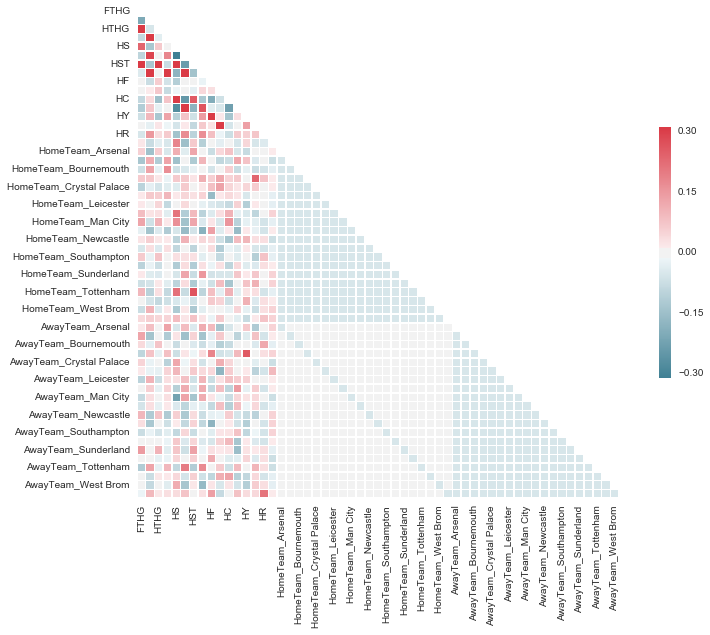

In [87]:
sns.set(style="white")

#Computing the Corelation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

###  Variable Importance

In [88]:
model.feature_importances_

array([  4.67251092e-01,   5.20185724e-01,   5.25352753e-03,
         0.00000000e+00,   2.07483152e-04,   5.61676531e-04,
         1.23885671e-04,   2.74779504e-03,   1.24421520e-04,
         4.34671008e-04,   1.77298873e-04,   2.15416994e-04,
         5.29188948e-05,   6.52473746e-04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.06014954e-04,
         0.00000000e+00,   5.34142982e-05,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   8.71628558e-04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   3.16857164e-04,
         6.63699768e-04,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

C:\Users\Touseef\Anaconda2\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


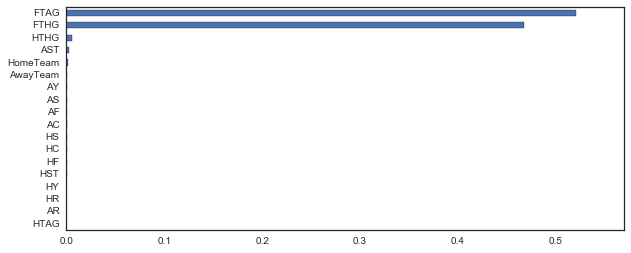

In [89]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
      
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)

# Parameters test
### n_jobs

In [90]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y)

1 loop, best of 3: 3.76 s per loop


In [91]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y)

1 loop, best of 3: 3.8 s per loop


### n_estimators

30 trees
C-stat:  0.997549019608

50 trees
C-stat:  0.997535014006

100 trees
C-stat:  0.997464985994

200 trees
C-stat:  0.997324929972

500 trees
C-stat:  0.997226890756

1000 trees
C-stat:  0.997170868347

2000 trees
C-stat:  0.997128851541



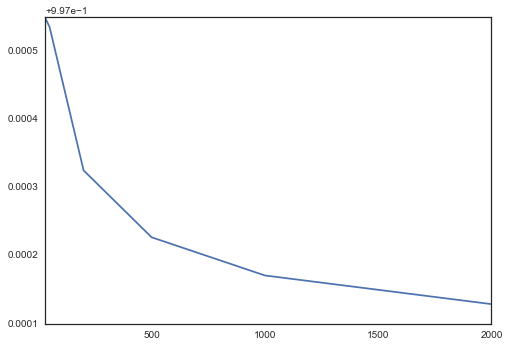

In [92]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.997170868347

None option
C-stat:  0.997170868347

sqrt option
C-stat:  0.997927170868

log2 option
C-stat:  0.998011204482

0.9 option
C-stat:  0.999355742297

0.2 option
C-stat:  0.999047619048



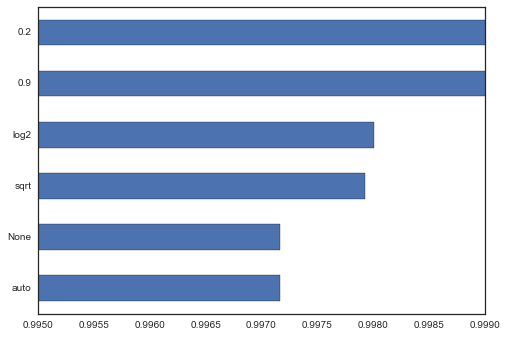

In [93]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.995,.999));

### min_samples_leaf

1 min samples
C-stat:  0.997170868347

2 min samples
C-stat:  0.996736694678

3 min samples
C-stat:  0.996484593838

4 min samples
C-stat:  0.996316526611

5 min samples
C-stat:  0.99606442577

6 min samples
C-stat:  0.996148459384

7 min samples
C-stat:  0.99581232493

8 min samples
C-stat:  0.995644257703

9 min samples
C-stat:  0.99568627451

10 min samples
C-stat:  0.995700280112



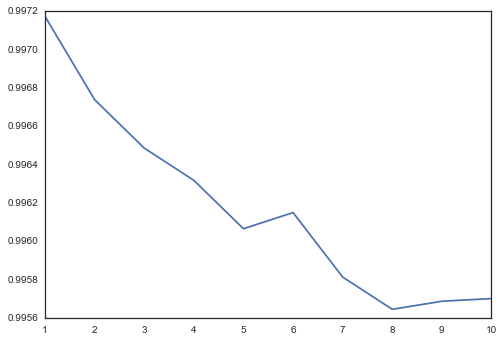

In [94]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

## Final Random Forest Model

In [95]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.99606442577
